PROBLEM  STATEMENT: Predict the Magnitude of Earthquake


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("earthquake_data_tsunami.csv")

In [3]:
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [4]:
data.tail()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,2001,1,0
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,2001,1,0


In [5]:
data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [6]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


To predict magnitude we can drop year,month and also cdi , mmi and tsunami because these are the after effects of earthquack and the intensity of magnitude so to predict magnitude we can drop that.

In [7]:
data.drop(["cdi", "mmi", "Year", "Month", "tsunami"], axis=1, inplace=True)

In [8]:
data.head()

,magnitude,sig,nst,dmin,gap,depth,latitude,longitude
0,7.0,768,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,735,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,755,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,833,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,670,131,4.998,27.0,624.464,-25.5948,178.278


EDA

UNIVARIANT ANALYSIS

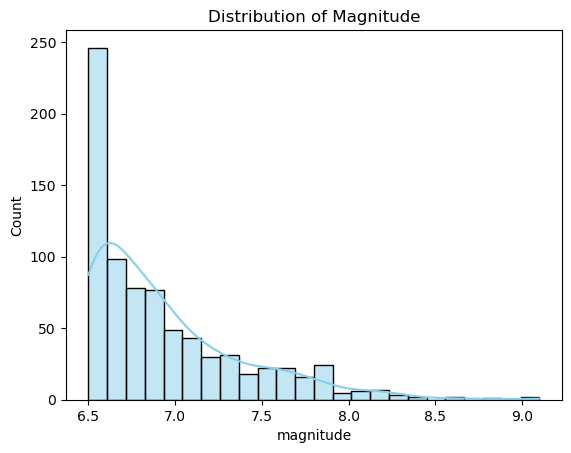

In [9]:
sns.histplot(data['magnitude'], kde=True, color='skyblue')
plt.title('Distribution of Magnitude')
plt.show()

In [10]:
data['magnitude'].skew() # heavy skewness is there but for tree based algorithm skewness is not a problem as it is robust to skewness

np.float64(1.4444399877408625)

MULTIVARIANT ANALYSIS

In [15]:
data.head()

,magnitude,sig,nst,dmin,gap,depth,latitude,longitude
0,7.0,768,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,735,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,755,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,833,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,670,131,4.998,27.0,624.464,-25.5948,178.278


sig=sig is a measure of the earthquake's total consequence.

nst= nst tells you the quantity of data collected.
If nst is HIGH (e.g., 300)	: Meaning: Many stations (people) recorded the earthquake.	
Significance: The earthquake was probably large and its measurements are likely accurate because many sources confirmed the data.

nst is low: Significance: The earthquake was either small or occurred in a remote area with poor coverage.
Meaning: Only a few stations (people) recorded the earthquake.


dmin: dmin tells you the quality and clarity of the best piece of data collected.
If dmin is SMALL (close to 0): Meaning: There was a station right on top of or very close to the earthquake's location. 
Significance: The location and time of the earthquake can be determined with very high precision because it was recorded clearly nearby.

if dmin is large: : The nearest station was very far away.The data is less precise because the waves had to travel a long distance before being recorded.

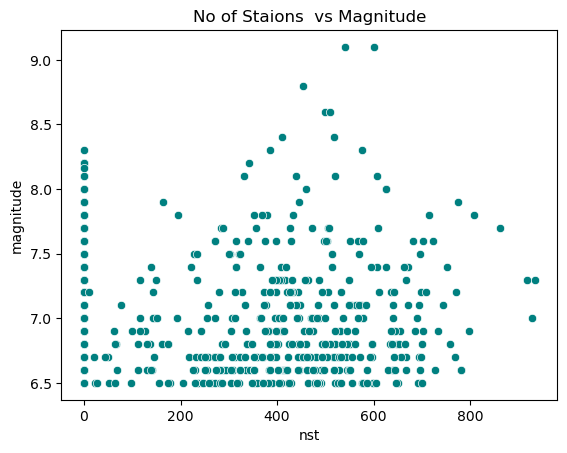

In [17]:
sns.scatterplot(x='nst', y='magnitude', data=data, color='teal')
plt.title('No of Staions  vs Magnitude')
plt.show()


As the magnitude of the earthquake increases, the nst value also tends to increase. This relationship is not perfectly linear, but the clustering of points clearly moves up and to the right.

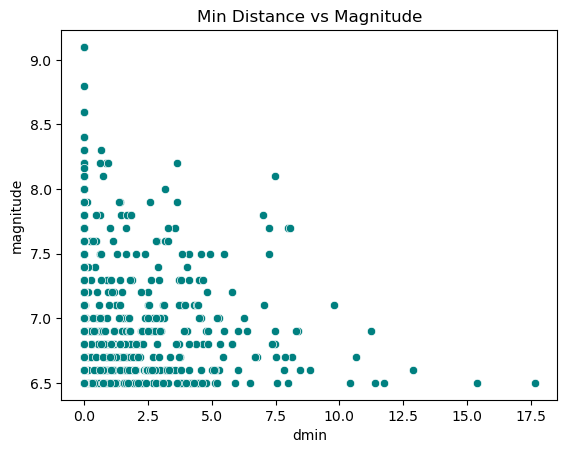

In [18]:
sns.scatterplot(x='dmin', y='magnitude', data=data, color='teal')
plt.title('Min Distance vs Magnitude')
plt.show()


When dmin value is less, the staion is nearer so the magnitude is defined with high precision
When dmin value is more, the staion is far so magnitude is less precise as waves has to travel long distance before being recorded.

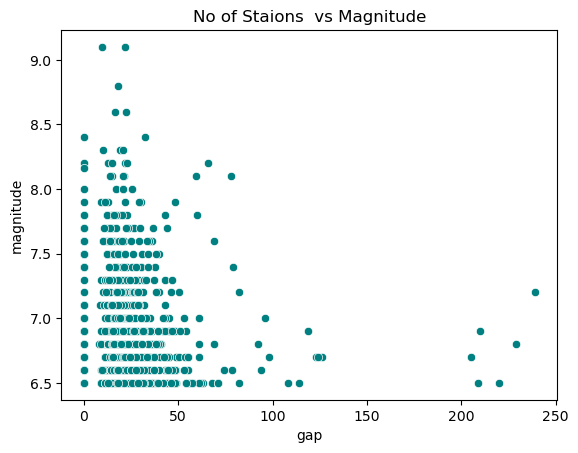

In [19]:
sns.scatterplot(x='gap', y='magnitude', data=data, color='teal')
plt.title('No of Staions  vs Magnitude')
plt.show()


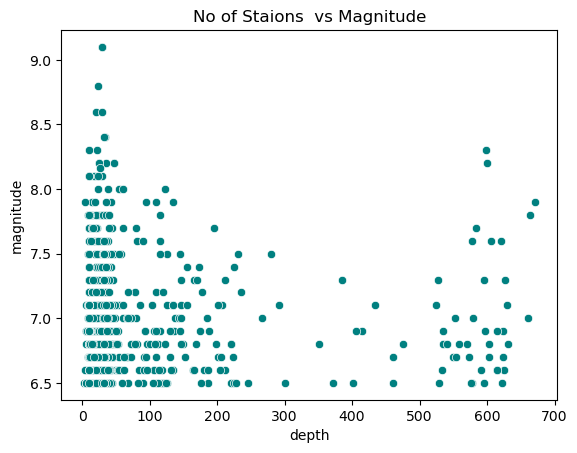

In [20]:
sns.scatterplot(x='depth', y='magnitude', data=data, color='teal')
plt.title('No of Staions  vs Magnitude')
plt.show()


Depth predict impact not the magnitude value
High Magnitude at Low Depth = High Impact (Shaking & Tsunami Risk)

High Magnitude at High Depth = Low Impact (Shaking)

In [ ]:
sns.scatterplot(x='depth', y='magnitude', data=data, color='teal')
plt.title('No of Staions  vs Magnitude')
plt.show()


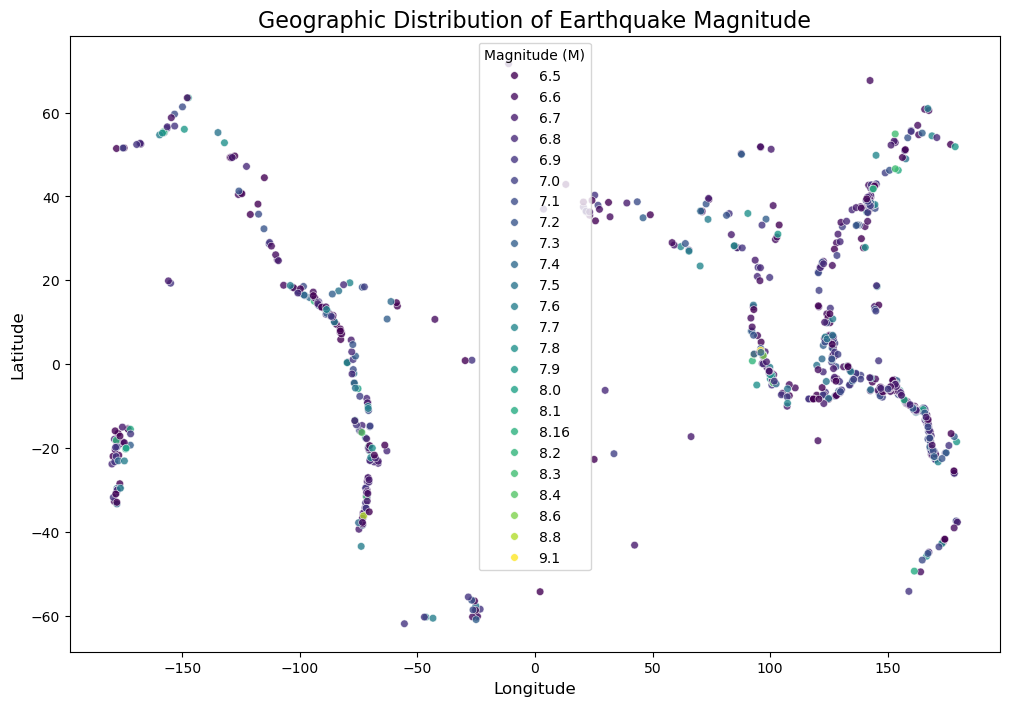

In [21]:
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='magnitude',
    data=data,
    palette='viridis', # A good palette for continuous data
    s=30, # size of the dots
    alpha=0.8,
    legend='full'
)

# Add title and labels
plt.title('Geographic Distribution of Earthquake Magnitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
scatterplot.legend_.set_title('Magnitude (M)')